Задание 1 (Розовый шум)

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import scipy

In [5]:
duration = 5  # Продолжительность в секундах
sample_rate = 4100  # Частота дискретизации в Гц
num_samples = int(duration * sample_rate)

<ipython-input-9-0bc5150dc483>:6: RuntimeWarning: divide by zero encountered in divide
  pink_spectrum = np.real(spectrum) / np.sqrt(np.abs(frequencies))


[ 0.01647181  0.00683726 -0.02975907 ... -0.01796033 -0.02975907
  0.00683726]


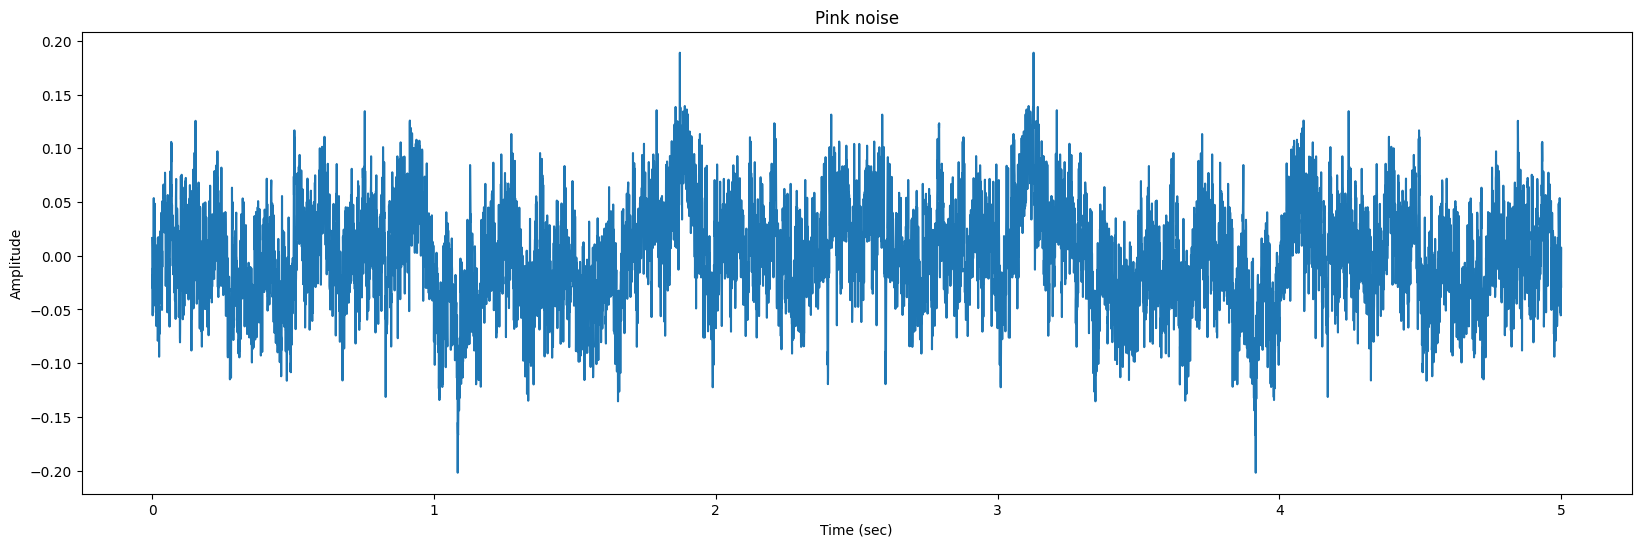

In [9]:
#Генерируем белый шум
white_noise_g = np.random.normal(loc = 0, scale = 1, size = num_samples)
#Генерируем розовый шум
spectrum = np.fft.rfft(white_noise_g)
frequencies = np.fft.rfftfreq(num_samples, 1/sample_rate)
pink_spectrum = np.real(spectrum) / np.sqrt(np.abs(frequencies))
pink_spectrum[frequencies == 0] = np.median(pink_spectrum)
pink_noise = np.fft.ifft(pink_spectrum)
pink_noise = np.real(pink_noise)
print(pink_noise)


time_axis = np.linspace(0, duration, len(pink_noise))

plt.figure(figsize=(20, 6))

plt.plot(time_axis, pink_noise)

plt.title('Pink noise')
plt.xlabel('Time (sec)')
plt.ylabel('Amplitude')

plt.show()

Задание 2 (Чёрный шум)

In [15]:
# Получение значений физических констант
kb = scipy.constants.k  # Константа Больцмана
h = scipy.constants.physical_constants['Planck constant'][0]  # Постоянная Планка
c = scipy.constants.c  # Скорость света

print(kb)
print(h)
print(c)

# Задание значений переменных
T = 17 * 1 / np.power(10, 9)  # Температура
G = 10  # Гравитационная постоянная

# Вычисление коэффициентов
coef1 = 2 * h / (c * c * T * T * T)
coef2 = h / (kb * T)

freq1 = 1000  # Частота

# Вычисление количества сэмплов
duration = 1  # Продолжительность
sample_rate = 44100  # Частота дискретизации
num_samples = int(duration * freq1)

# Создание массива для черного шума
black_noise = np.zeros(num_samples)

# Создание оси времени
time_axis = np.arange(num_samples) / sample_rate

# Создание массива для белого шума
white_noise_g = np.random.normal(loc = 0, scale = 1, size = num_samples)

# Вычисление эквализации
eq = 10 * np.log(coef1 * np.power(freq1, 3) / (np.exp(coef2 * freq1) - 1)) + 10

# Создание черного шума путем сложения белого шума и эквализации
black_noise = white_noise_g + eq

# Нормализация черного шума
black_noise /= np.max(np.abs(black_noise))


1.380649e-23
6.62607015e-34
299792458.0


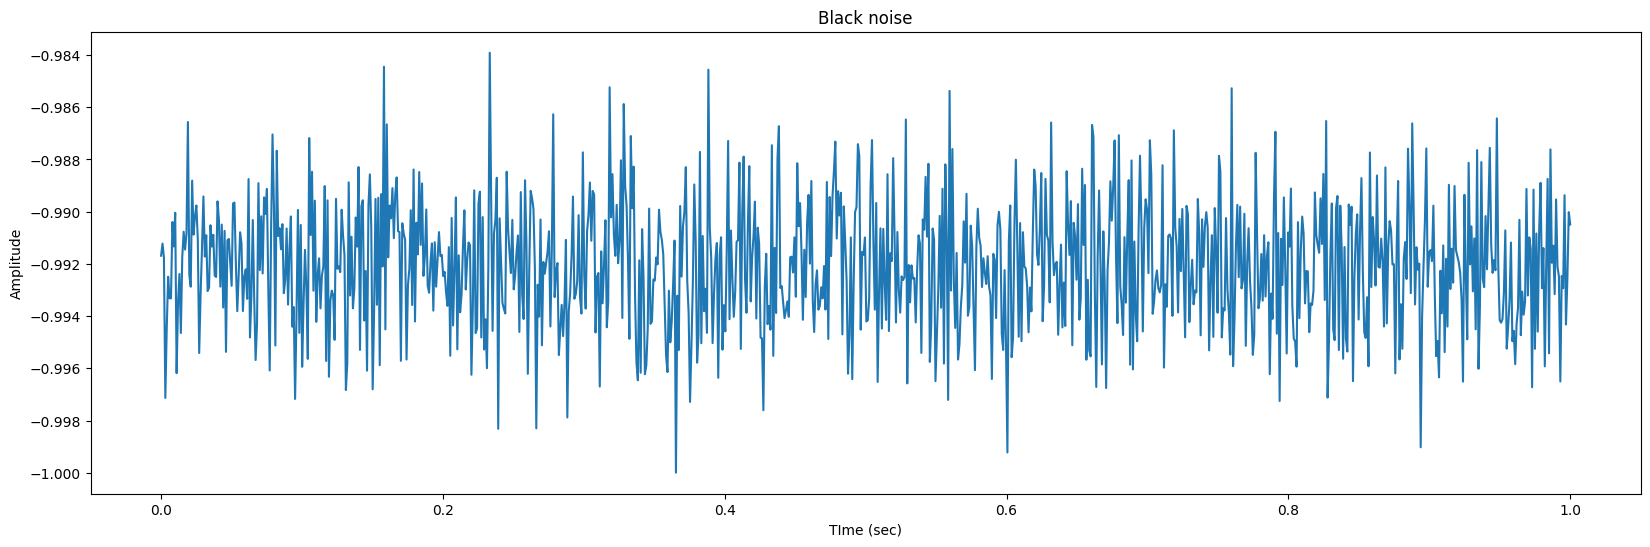

In [16]:
# Визуализация
time_axis = np.linspace(0, duration, len(black_noise))
plt.figure(figsize=(20, 6))
plt.plot(time_axis, black_noise)
plt.title('Black noise')
plt.xlabel('TIme (sec)')
plt.ylabel('Amplitude')
plt.show()

Задание 3 (Генерация временного ряда)


<ipython-input-48-e17263da90b1>:29: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  fig.legend([c1, c2, c3],


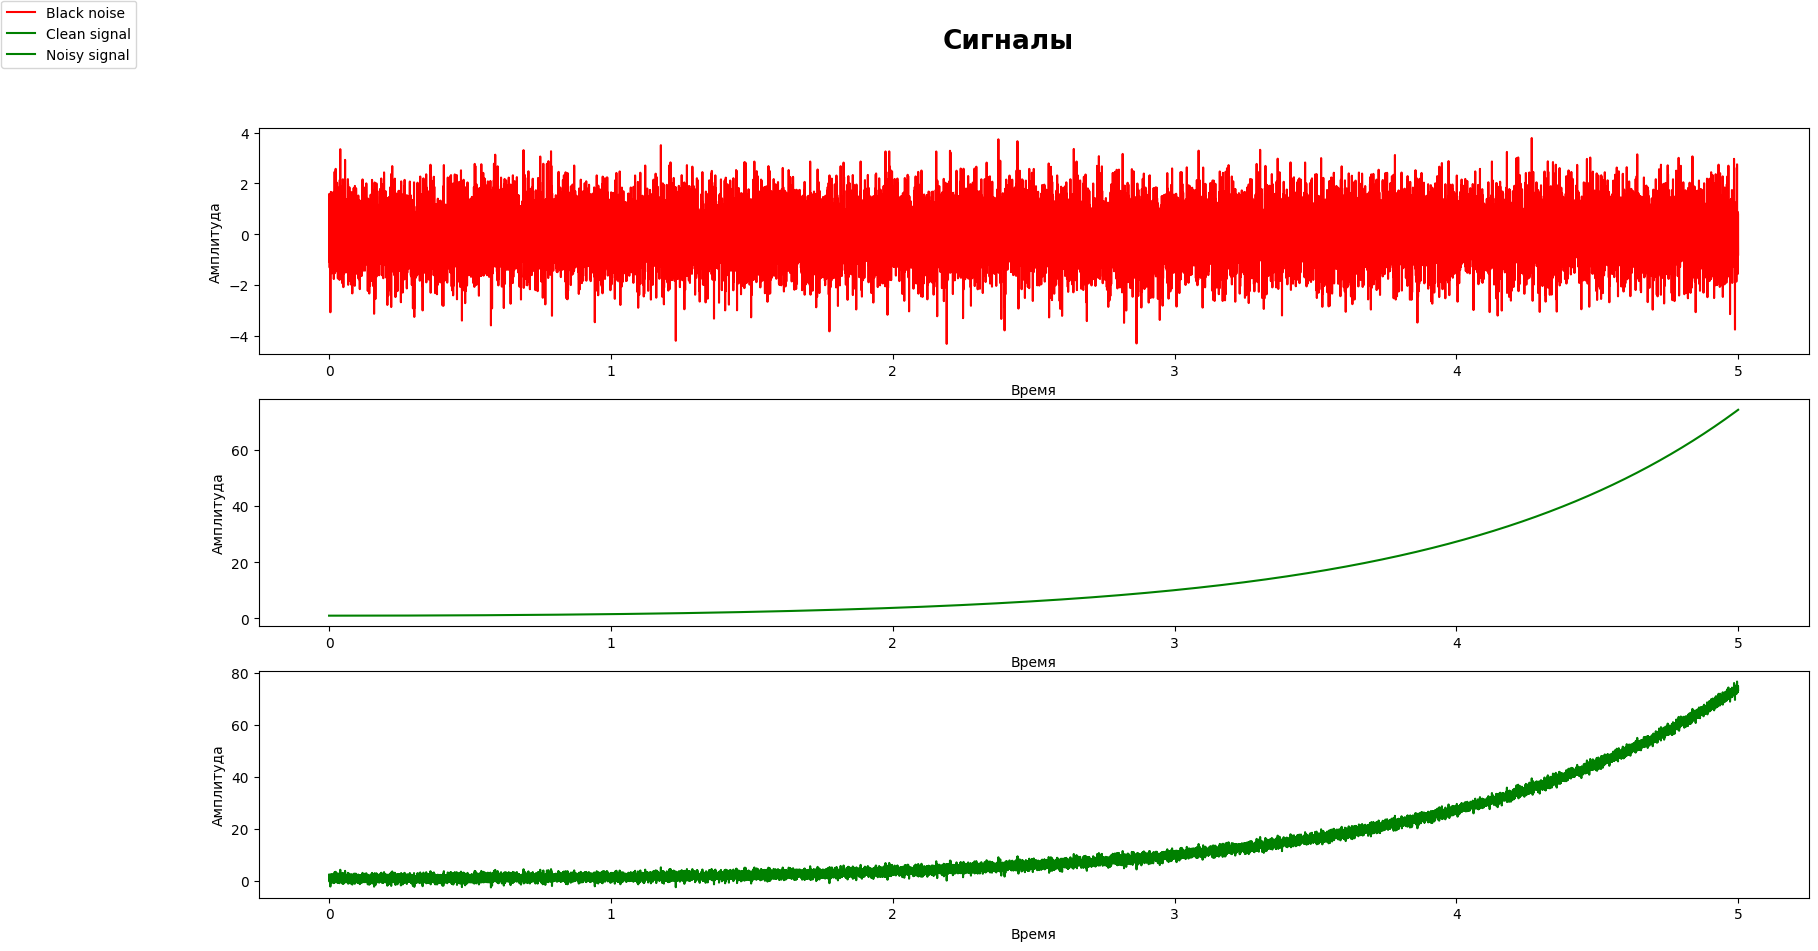

In [48]:
duration = 5
sample_rate = 4100
num_points = duration*sample_rate

time_points = np.linspace(0, duration, num_points)
values = np.cosh(time_points)

white_noise_g = np.random.normal(loc = 0, scale = 1, size = num_points)
values_noise = values + white_noise_g

fig, axs = plt.subplots(3, 1, figsize=(20, 10))

fig.suptitle('Сигналы', fontsize=19, fontweight='bold')

labels = ["Black noise", "Clean signal", "Noisy signal"]

c1 = axs[0].plot(time_points, white_noise_g, color="red")
axs[0].set_xlabel('Время')
axs[0].set_ylabel('Амплитуда')

c2 = axs[1].plot(time_points, values, color="green")
axs[1].set_xlabel('Время')
axs[1].set_ylabel('Амплитуда')

c3 = axs[2].plot(time_points, values_noise, color="green")
axs[2].set_xlabel('Время')
axs[2].set_ylabel('Амплитуда')

fig.legend([c1, c2, c3],
           labels=labels,
           loc='upper left',
           borderaxespad=0.1)

